# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from sklearn.preprocessing import StandardScaler

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [4]:
# Load dataset
df = pd.read_csv('online-sales-dataset_raw.csv')

# Menampilkan info dasar
print(df.info())
display(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49782 entries, 0 to 49781
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   InvoiceNo          49782 non-null  int64  
 1   StockCode          49782 non-null  object 
 2   Description        49782 non-null  object 
 3   Quantity           49782 non-null  int64  
 4   InvoiceDate        49782 non-null  object 
 5   UnitPrice          49782 non-null  float64
 6   CustomerID         44804 non-null  float64
 7   Country            49782 non-null  object 
 8   Discount           49782 non-null  float64
 9   PaymentMethod      49782 non-null  object 
 10  ShippingCost       47293 non-null  float64
 11  Category           49782 non-null  object 
 12  SalesChannel       49782 non-null  object 
 13  ReturnStatus       49782 non-null  object 
 14  ShipmentProvider   49782 non-null  object 
 15  WarehouseLocation  46297 non-null  object 
 16  OrderPriority      497

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Discount,PaymentMethod,ShippingCost,Category,SalesChannel,ReturnStatus,ShipmentProvider,WarehouseLocation,OrderPriority
0,221958,SKU_1964,White Mug,38,2020-01-01 00:00,1.71,37039.0,Australia,0.470000,Bank Transfer,10.79,Apparel,In-store,Not Returned,UPS,London,Medium
1,771155,SKU_1241,White Mug,18,2020-01-01 01:00,41.25,19144.0,Spain,0.190000,paypall,9.51,Electronics,Online,Not Returned,UPS,Rome,Medium
2,231932,SKU_1501,Headphones,49,2020-01-01 02:00,29.11,50472.0,Germany,0.350000,Bank Transfer,23.03,Electronics,Online,Returned,UPS,Berlin,High
3,465838,SKU_1760,Desk Lamp,14,2020-01-01 03:00,76.68,96586.0,Netherlands,0.140000,paypall,11.08,Accessories,Online,Not Returned,Royal Mail,Rome,Low
4,359178,SKU_1386,USB Cable,-30,2020-01-01 04:00,-68.11,NaN,United Kingdom,1.501433,Bank Transfer,NaN,Electronics,In-store,Not Returned,FedEx,NaN,Medium


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [6]:
# Mengetahui jumlah atribut kosong
print("Jumlah atribut kosong:")
df.isnull().sum()

Jumlah atribut kosong:


InvoiceNo               0
StockCode               0
Description             0
Quantity                0
InvoiceDate             0
UnitPrice               0
CustomerID           4978
Country                 0
Discount                0
PaymentMethod           0
ShippingCost         2489
Category                0
SalesChannel            0
ReturnStatus            0
ShipmentProvider        0
WarehouseLocation    3485
OrderPriority           0
dtype: int64

In [7]:
# Mengecek jumlah baris duplikat
print(f"Jumlah baris duplikat: {df.duplicated().sum()}")

# Mengecek 'Quantity' dan 'UnitPrice' yang bernilai negatif
print(f"Jumlah baris dengan 'Quantity' negatif: {df[df['Quantity'] < 0].shape[0]}")
print(f"Jumlah baris dengan 'UnitPrice' negatif: {df[df['UnitPrice'] < 0].shape[0]}")

# Jumlah pesanan yang dikembalikan
print(f"Jumlah baris pesanan dikembalikan: {df[df['ReturnStatus'] == 'Returned'].shape[0]}")

Jumlah baris duplikat: 0
Jumlah baris dengan 'Quantity' negatif: 2489
Jumlah baris dengan 'UnitPrice' negatif: 1493
Jumlah baris pesanan dikembalikan: 4894


# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [8]:
# Mengubah tipe data 'InvoiceDate' menjadi tanggal
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], errors='coerce')

# Menghapus baris yang tidak memiliki  'CustomerID'
df_clean = df.dropna(subset=["CustomerID"])

# Mengubah CustomerID jadi integer agar tidak ada koma (45866.0 -> 45866)
df_clean['CustomerID'] = df_clean['CustomerID'].astype(int)

# Mengambil transaksi yang sukses (Tidak dikembalikan)
df_clean = df_clean[df_clean['ReturnStatus'] == 'Not Returned']

# Menghapus baris dengan 'Quantity' dan 'UnitPrice' < 0
df_clean = df_clean[df_clean['Quantity'] > 0]
df_clean = df_clean[df_clean['UnitPrice'] > 0]

# Feature Engineering: TotalPrice (untuk fitur Monetary)
df_clean['DiscountClipped'] = df_clean['Discount'].clip(lower=0, upper=1) # Diskon antara 0% dan 100%
df_clean['TotalPrice'] = df_clean['Quantity'] * df_clean['UnitPrice'] * (1 - df_clean['DiscountClipped'])

print(f"Jumlah baris data bersih: {df_clean.shape[0]}")
df_clean.head()

Jumlah baris data bersih: 40417


C:\Users\user\AppData\Local\Temp\ipykernel_21304\1936747441.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['CustomerID'] = df_clean['CustomerID'].astype(int)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Discount,PaymentMethod,ShippingCost,Category,SalesChannel,ReturnStatus,ShipmentProvider,WarehouseLocation,OrderPriority,DiscountClipped,TotalPrice
0,221958,SKU_1964,White Mug,38,2020-01-01 00:00:00,1.71,37039,Australia,0.47,Bank Transfer,10.79,Apparel,In-store,Not Returned,UPS,London,Medium,0.47,34.4394
1,771155,SKU_1241,White Mug,18,2020-01-01 01:00:00,41.25,19144,Spain,0.19,paypall,9.51,Electronics,Online,Not Returned,UPS,Rome,Medium,0.19,601.4250
3,465838,SKU_1760,Desk Lamp,14,2020-01-01 03:00:00,76.68,96586,Netherlands,0.14,paypall,11.08,Accessories,Online,Not Returned,Royal Mail,Rome,Low,0.14,923.2272
5,744167,SKU_1006,Office Chair,47,2020-01-01 05:00:00,70.16,53887,Sweden,0.48,Credit Card,13.98,Electronics,Online,Not Returned,DHL,London,Medium,0.48,1714.7104
6,210268,SKU_1087,USB Cable,25,2020-01-01 06:00:00,85.74,46567,Belgium,0.15,Bank Transfer,12.92,Stationery,Online,Not Returned,FedEx,Amsterdam,High,0.15,1821.9750


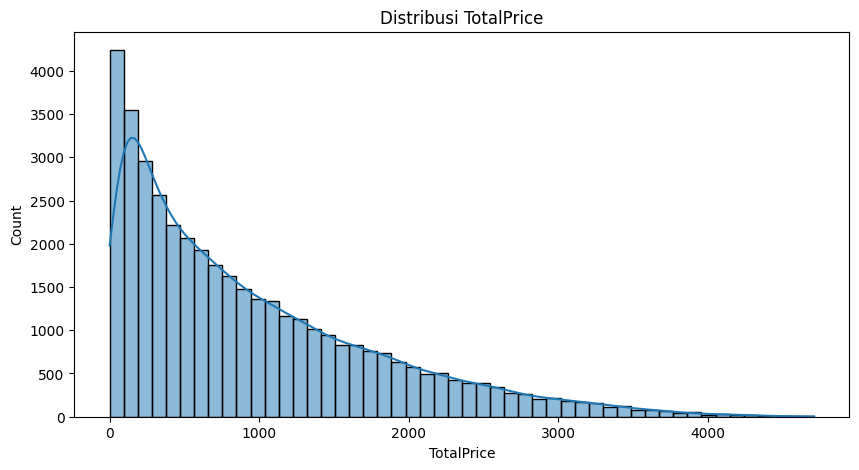

In [9]:
# Distribusi harga total
plt.figure(figsize=(10, 5))
sns.histplot(df_clean['TotalPrice'], bins=50, kde=True)
plt.title('Distribusi TotalPrice')
plt.show()

In [10]:
# Menentukan tanggal referensi (Snapshot Date)
# Mengambil tanggal transaksi terakhir di dataset, lalu tambah 1 hari
snapshot_date = df_clean['InvoiceDate'].max() + dt.timedelta(days=1)
print(f"Tanggal Snapshot: {snapshot_date}")

# Menghitung RFM
rfm = df_clean.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days, # Recency: Jarak hari dari transaksi terakhir
    'InvoiceNo': 'count',                                  # Frequency: Jumlah order unik (bukan quantity barang)
    'TotalPrice': 'sum'                                      # Monetary: Total uang yang dibelanjakan
}).reset_index()

# 3. Rename kolom agar mudah dipahami
rfm.rename(columns={
    'InvoiceDate': 'Recency',
    'InvoiceNo': 'Frequency',
    'TotalPrice': 'Monetary'
}, inplace=True)

print("Jumlah customer dalam RFM:", len(rfm))
rfm.head()

Tanggal Snapshot: 2025-09-06 05:00:00
Jumlah customer dalam RFM: 32606


,CustomerID,Recency,Frequency,Monetary
0,10001,742,1,1470.7334
1,10003,1842,1,365.7385
2,10005,251,2,2350.1430
3,10008,145,1,48.8280
4,10009,1826,1,463.5904


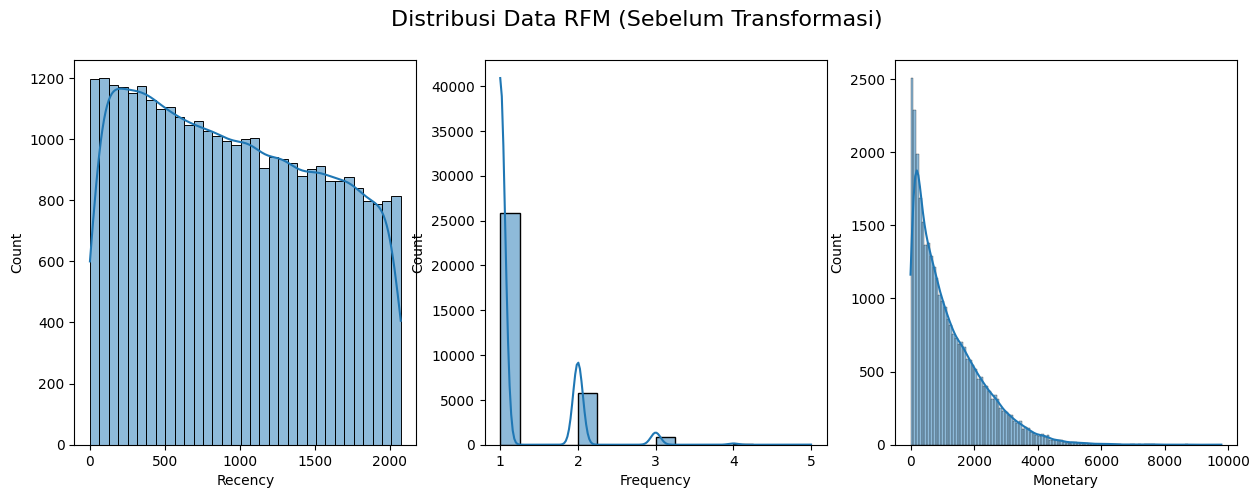

In [11]:
# Visualisasi Distribusi Data Asli
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
sns.histplot(rfm['Recency'], kde=True, ax=ax[0])
sns.histplot(rfm['Frequency'], kde=True, ax=ax[1])
sns.histplot(rfm['Monetary'], kde=True, ax=ax[2])
plt.suptitle('Distribusi Data RFM (Sebelum Transformasi)', fontsize=16)
plt.show()

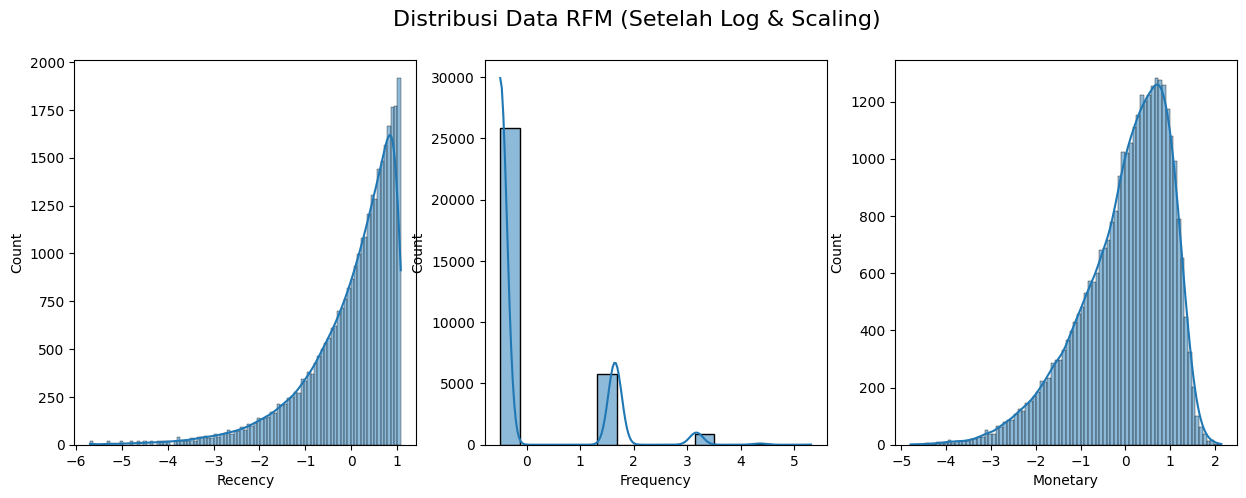

In [13]:
# Scaling dan Standarisasi RFM
rfm_features = rfm[['Recency', 'Frequency', 'Monetary']].copy()

# Log Transformation
# Menggunakan np.log1p (log(x+1)) untuk menghindari error jika ada nilai 0
# Tujuannya agar distribusi data lebih mendekati normal (tidak skewed)
rfm_log = rfm_features.apply(np.log1p)

# Scaling
scaler_rfm = StandardScaler()
rfm_scaled = scaler_rfm.fit_transform(rfm_log)

# Ubah kembali ke DataFrame agar mudah dibaca
rfm_scaled_df = pd.DataFrame(rfm_scaled, columns=['Recency', 'Frequency', 'Monetary'])
rfm_scaled_df['CustomerID'] = rfm['CustomerID']
rfm_scaled_df.head()

# Menyimpan output ke csv
rfm_scaled_df.to_csv('online-sales-dataset_preprocessing.csv', index=False)

# Visualisasi Distribusi Setelah Transformasi
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
sns.histplot(rfm_scaled_df['Recency'], kde=True, ax=ax[0])
sns.histplot(rfm_scaled_df['Frequency'], kde=True, ax=ax[1])
sns.histplot(rfm_scaled_df['Monetary'], kde=True, ax=ax[2])
plt.suptitle('Distribusi Data RFM (Setelah Log & Scaling)', fontsize=16)
plt.show()